<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression Code Along

## Multiple Regression Analysis using city bike data 


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.



#### Scikit-learn & statsmodels

In this codealong, we will look at making models in both statsmodels & scikit-learn.

The differences between them highlight what each in particular has to offer: scikit-learn’s other popular topics are machine learning and data science; statsmodels are econometrics, generalized-linear-models, timeseries-analysis, and regression-models. 

These topic tags reflect the conventional wisdom that scikit-learn is for machine learning and statsmodels is for statistical modeling.

Syntax (and output) for statsmodels is very similar to similar packages in R.

#### Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

#statsmodels
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf


# scikit-learn
from sklearn import feature_selection, linear_model



#### Writing a function to return regression fit metrics for scikit-learn

In [2]:
def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print('P Values:', pvals)
    print('Coefficients:', algo.coef_)
    print('y-intercept:', algo.intercept_)
    print('R-Squared:', algo.score(X,y))
    
    plt.figure()
    plt.hist(residuals)
    # keep the model
    return algo


#### Importing the city bike data

In [3]:
bike_data = pd.read_csv('assets/data/bikeshare2.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


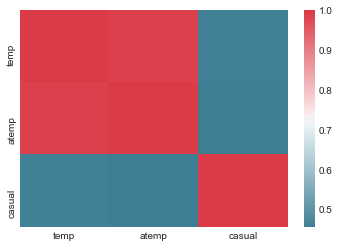

In [4]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### The correlation matrix explains that:

- both temperature fields are moderately correlated to guest ridership;
- the two temperature fields are highly correlated to each other.


Including both of these fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is effecting the predicted value.

#### We can measure this effect in the coefficients:



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163
atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733
temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661


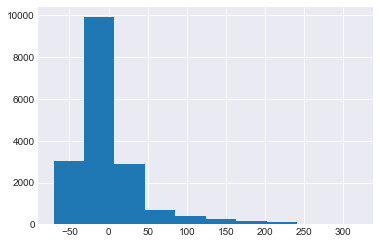

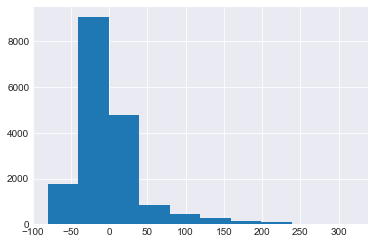

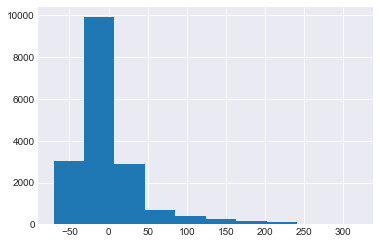

In [5]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print(', '.join(x))
    get_linear_model_metrics(bike_data[x], y, 
                             linear_model.LinearRegression())
    print

####  Intrepretation: 
Even though the 2-variable model temp + atemp has a higher explanation of variance than two variables on their own, and both variables are considered significant (p values approaching 0), we can see that together, their coefficients are wildly different. 

This can introduce error in how we explain models.




#### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

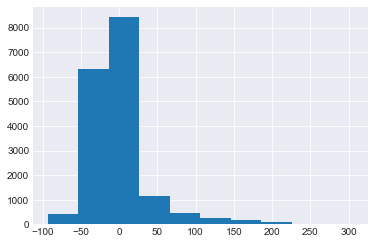

In [6]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


#### What happens to the coefficients when you include all weather situations instead of just including all except one?

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  5.33996323e+12   5.33996323e+12   5.33996323e+12   5.33996323e+12]
y-intercept: -5.33996323254e+12
R-Squared: 0.0233906300439


<function print>

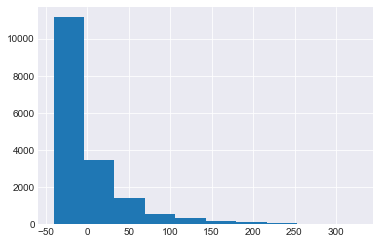

In [7]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print


P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666667
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

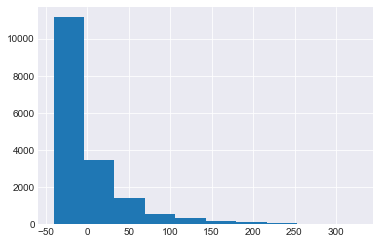

In [8]:
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


#### Similar in Statsmodels

In [9]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           1.38e-87
Time:                        12:44:23   Log-Likelihood:                -92198.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.565e+13    4.6e+13     -0.774      0.439   -1.26e+14    5.46e+13
weather[[1, 2, 3, 4]][0]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][1]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][2]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][3]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
==============================================================================
Omnibus:                     8985.326   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58717.202
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      10.537   Cond. No.                     3.46e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           8.08e-89
Time:                        12:44:23   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924     -52.478      57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178     -17.274      93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339     -28.235      82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635     -41.814      68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation: 

This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




#### Combining non-correlated features into a better model 

In [11]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Next, we want to:

- Add the three significant weather situations into our current model
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [12]:
#solution
lm = linear_model.LinearRegression()


weather = pd.get_dummies(bike_data.weathersit)
weather.columns = ['weather_' + str(i) for i in weather.columns]

hours = pd.get_dummies(bike_data.hr)
hours.columns = ['hour_' + str(i) for i in hours.columns]

season = pd.get_dummies(bike_data.season)
season.columns = ['season_' + str(i) for i in season.columns]




In [13]:
bikemodel_data = bike_data.join(weather) # add in the three weather situations
bikemodel_data = bikemodel_data.join(hours)
bikemodel_data = bikemodel_data.join(season)

bikemodel_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,season_1,season_2,season_3,season_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,1,0,0,0


In [14]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)


columns_to_keep = ['temp', 'hum', 'windspeed', 'weather_1', 'weather_2', 'weather_3', 'holiday',]
columns_to_keep.extend(['hour_' + str(i) for i in range(1, 24)])

correlations = bikemodel_data[columns_to_keep].corr()

correlations.head(10)


,temp,hum,windspeed,weather_1,weather_2,weather_3,holiday,hour_1,hour_2,hour_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
temp,1.000000,-0.069881,-0.023125,0.101044,-0.069657,-0.062406,-0.027340,-0.040738,-0.045627,-0.046575,...,0.073992,0.077838,0.073918,0.062626,0.047992,0.029525,0.012609,-0.001830,-0.013554,-0.023847
hum,-0.069881,1.000000,-0.290105,-0.383425,0.220758,0.309737,-0.010588,0.083197,0.096198,0.108659,...,-0.141266,-0.146532,-0.142656,-0.123506,-0.098888,-0.059376,-0.027918,0.004671,0.028089,0.049900
windspeed,-0.023125,-0.290105,1.000000,0.005150,-0.049241,0.070018,0.003988,-0.053580,-0.060241,-0.065444,...,0.072461,0.077046,0.080822,0.074068,0.059114,0.034269,0.008759,-0.015770,-0.026419,-0.043234
weather_1,0.101044,-0.383425,0.005150,1.000000,-0.822961,-0.412414,0.009167,0.008819,0.005156,-0.001685,...,-0.002867,0.003782,0.018486,0.016674,0.013256,0.018700,0.025354,0.021120,0.018700,0.008417
weather_2,-0.069657,0.220758,-0.049241,-0.822961,1.000000,-0.177417,0.004910,-0.006750,-0.003921,0.003843,...,0.002216,-0.008235,-0.026678,-0.028636,-0.021142,-0.019835,-0.032907,-0.021142,-0.017220,-0.013952
weather_3,-0.062406,0.309737,0.070018,-0.412414,-0.177417,1.000000,-0.023664,-0.005379,-0.002518,-0.003117,...,0.001548,0.006789,0.009842,0.017174,0.010026,-0.000463,0.008977,-0.002561,-0.004659,0.007928
holiday,-0.027340,-0.010588,0.003988,0.009167,0.004910,-0.023664,1.000000,0.000293,0.000744,-0.003602,...,0.000045,0.000045,-0.000004,-0.000004,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095
hour_1,-0.040738,0.083197,-0.053580,0.008819,-0.006750,-0.005379,0.000293,1.000000,-0.043188,-0.042618,...,-0.043627,-0.043627,-0.043658,-0.043658,-0.043596,-0.043596,-0.043596,-0.043596,-0.043596,-0.043596
hour_2,-0.045627,0.096198,-0.060241,0.005156,-0.003921,-0.002518,0.000744,-0.043188,1.000000,-0.042340,...,-0.043343,-0.043343,-0.043374,-0.043374,-0.043312,-0.043312,-0.043312,-0.043312,-0.043312,-0.043312
hour_3,-0.046575,0.108659,-0.065444,-0.001685,0.003843,-0.003117,-0.003602,-0.042618,-0.042340,1.000000,...,-0.042771,-0.042771,-0.042802,-0.042802,-0.042740,-0.042740,-0.042740,-0.042740,-0.042740,-0.042740


AxesSubplot(0.125,0.125;0.62x0.755)


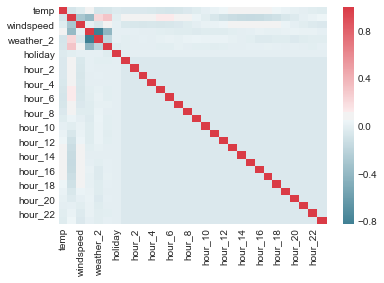

In [15]:
print(sns.heatmap(correlations, cmap=cmap))
